# **RainbowRio 2: An Open-Source System-On-Chip Generator for Scalable Manycore System Design**

<a href="https://colab.research.google.com/github/idea-fasoc/OpenFASOC/blob/main/docs/source/notebooks/temp-sense-gen/temp_sense_genCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
TBSI RIOS Lab Team, April 2023
SPDX-License-Identifier: Apache-2.0
```

![rainbowrio_logo](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExN2Q4N2VjZDViMzNkM2UzNDUzMGVhYTc2ZmI0MTJjNmYwMzc1MzMyYyZjdD1z/HtyL1uYAEk9MlIKQkY/giphy.gif)

|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Mingzi Wang (Leader) <br /> Email: wmz22@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Zhengxuan Luan <br /> Email: luanzx22@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Zexin Fu <br /> Email: fzx20@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Yifei Zhu <br /> Email: zhuyf20@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Yihai Zhang <br /> Email: zhang-yh22@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Guohua Yin <br /> Email: ygh21@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Lutong Zhang <br /> Email: zlt21@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Yexin Wei <br /> Email: yx-wei20@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Xi Wang <br /> Email: xiwang@tsinghua.edu.cn |RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Zhangxi Tan (Advisor) <br /> Email: xtan@rioslab.org|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|

## Catalog
[1 Abstract](#1)<br><br>
[2 Introduction](#2)<br><br>
[3 SoC Generator](#3)<br><br>
[4 NoC Architecture](#4)<br><br>
[5 Peripheral Devices](#5)<br><br>
[6 Cache Architecture](#6)<br><br>
[7 RTL to GDSII Flow](#7)<br><br>
[8 Design Verification](#8)

## Abstract
<a name="1"></a>
This notebook introduces **RainbowRio v2.0, an Open-Source System-On-Chip Generator for Scalable Manycore System Design.**

Attributed to the evergrowing complexity of manycore processor system architectures, constructing a hardware prototype for a manycore system from scratch has become increasingly challenging for researchers from academia. However, hardware prototyping is necessitated for PPA (performance, power and area) analysis and multicore system verifications such as the cache coherence. Under the restriction of the proprietary IPs of commercial off-the-shelf (COTS) processors, an open-source manycore system prototype featuring a high degree of extensibility, scalability, and configurability is strongly desired as a base scientific experimental platform to facilitate the research of parallel computing architectures. Besides the value for front-end processor research, such open-source manycore system also sheds a new light upon the emerging OpenEDA research employing the completely open-source EDA toolchains that entail large ASIC design to help exploit bottlenecks and optimization potentials of OpenEDA tools. 

Therefore, we introduce RainbowRio 2.0, an open-source manycore system platform with scalable network-on-chip (NoC) systems, portable coherennce fabrics and extensible SoC I/O device support. RainbowRio 2.0 is capable of configuring and generating user-defined NoC systems to satisfy specific design needs. Along with the NoC, the CHI-compatible coherence fabrics guaratee the intra/inter-die coherence betwee each core and provide unified interface to enhance the portability, making the manycore system feasible to scale out. Further, our SoC generator automatically produces the standard I/O communication support completing the end-to-end system implementations. 



## Introduction
<a name="2"></a>
Today, industry is building larger, more complex, manycore processors, which integrate multiple cores on a single chip. These cores communicate with each other via network-on-chip(NoC). NoCs are envisioned to be a scalable communication substrate for building multicore systems, which are expected to execute a large number of different applications and threads concurrently to maximize system performance. A NoC is a critical shared resource among these concurrently-executing applications, significantly affecting each application’s performance, system performance, and energy efficiency. But academic projects face difficulties in replicating that scale due to the lack of an open-source manycore framework.

With the increasing complexity of designs and process scaling, the cost and risk associated with implementing such innovative ideas into silicon are formidable. Open-source electronic design automation (EDA) aims to democratize chip design and overcome these barriers. Open-source EDA includes publicly available foundry processes, open-source process design kits (PDKs), intellectual property (IP) libraries, and EDA software tools that facilitate entire chip design flows. The use of open-source methodologies for implementing innovative designs is gaining popularity in academia and among research scholars. Today, over 1000 designs have been physically implemented using OpenLane, an open-source EDA tool, and successfully taped out in the Open Multi-Project Wafer (OpenMPW) project. However, this tool is not mature because it hasn't been verified by a sufficient number of large designs now. The community urgently need an open-source framework to swiftly iterate large RTL designs, which can improve the development of open-source EDA.

In response to these challenges, we present RainbowRio v2.0, aimed at providing an open-source full-stack manycore system exploration and evaluation platform for Open Source Community members. This project has three motivations and innovations. 

* First, RainbowRio v2.0 has been designed as a platform to enable manycore research. Unlike many other designs where the pieces are provided, and the final top file is up to the user to compose them together, RainbowRio v2.0 is designed with all of the components integrated into the same easy-to-use build infrastructure providing push-button scalability. RainbowRio v2.0 consists of three parts: Network-On-Chip generator, Low-speed Peripherals generator and High-performance Cache supporting coherence. The topology of this scalable NoC is 2D mesh, communicating via standard CHI-compatible bus. The Low-speed Peripherals components includes UART, GPIO, I2C and SPI, which can be configured by users. The Cache is a non-blocking high-performance cache which supports the MESI conherence protocol for multi-cores. This project provides a configuration json file to configure the NoC parameters, Peripherals parameters and EDA parameters according to the micro-architecture design of users.

* Second, micro-architecture researchers face thousands of wires to connect the routers and peripherals to finish the top-level file of the SoC in writing RTL. These tedious tasks will waste significant time and lead to many errors that cannot be detected during the compiling stage. Therefore, RainbowRio v2.0 provides users with a configurable SoC top-level-file generator to help them save time and be convenient to change their micro-architecture.

* Third, Openlane is an excellent open source EDA tool that can automatically execute RTL to GDSII streams based on multiple components such as OpenROAD, Yosys, Magic, and Netgen. Methodology scripts can be customized for design exploration and optimization. Given its rapid iteration and update, OpenLane necessitates a considerable number of large-scale designs for the purpose of conducting functional validation and enabling high-quality collaborative optimization. We believe that RainbowRio v2.0 will facilitate the emergence of large designs in the open-source community: it constitutes a highly configurable SoC generator design that is well-suited for contemporary high-performance chipsets. Members can conveniently connect their designs to the general CHI interface routers, constructing a large-scale network. This will help Open-source EDA researchers to improve and modify the Openlane.

As advocates and beneficiaries of open-source community, we have benefited from the improved iterative efficiency that open source brings. In this project, RainbowRio v2.0 will be a positive feedback contribution to the open-source community. We believe that RainbowRio v2.0 will be a meaningful milestone in paving the road to success of the Open-Hardware ecosystem. 



## SoC Generator
<a name="3"></a>
### SoC Diagram
This is one of the SOC architectures we have configured. We can also generate many other soc architectures. We will explain them in detail in soc_config.json

![2.png][1_png]

[1_png]: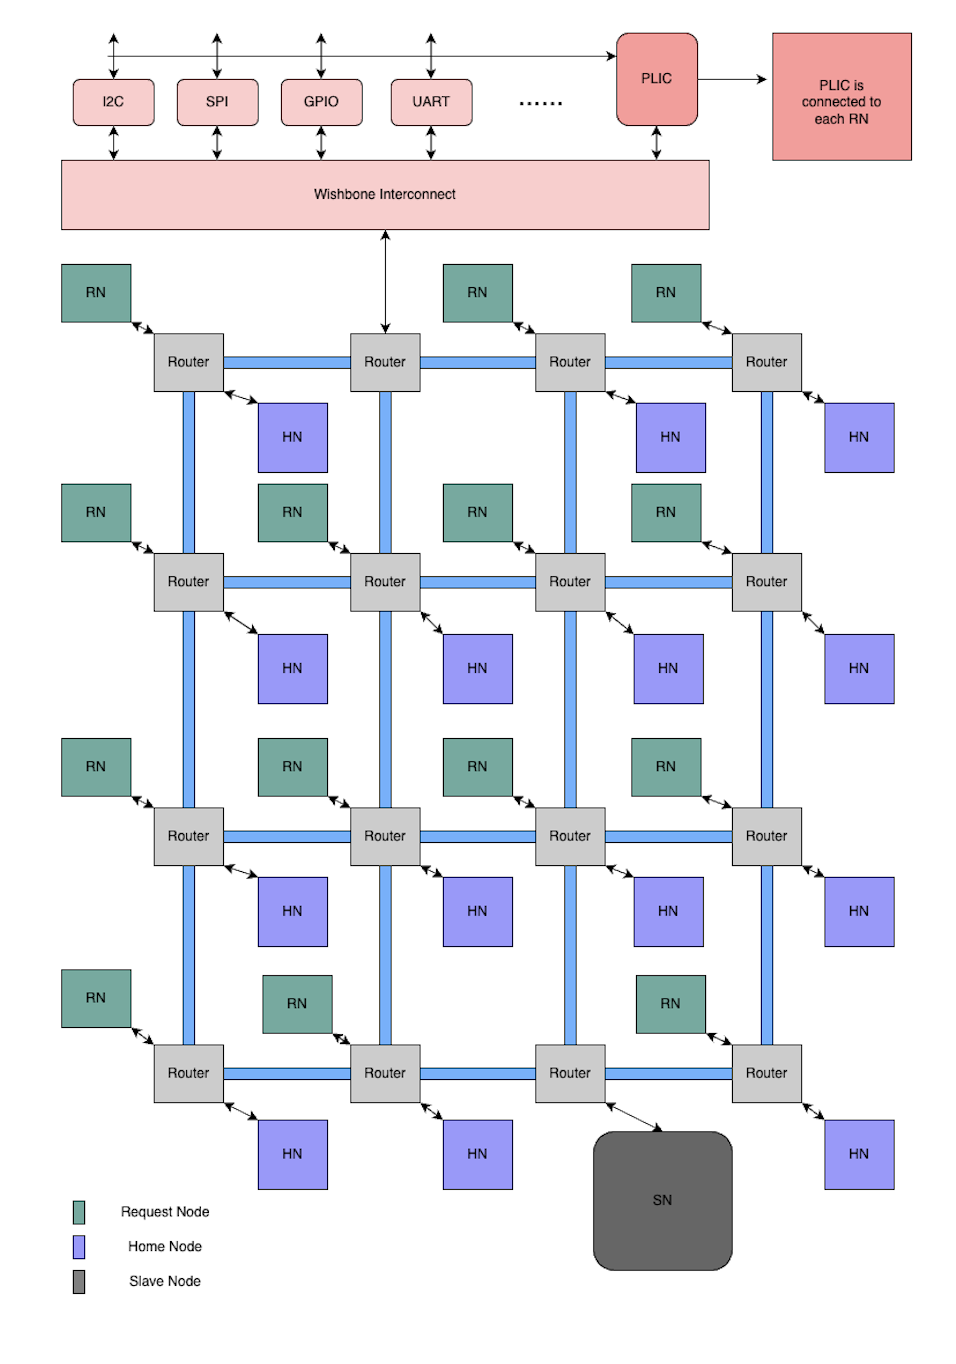

### soc_config.json

The following json file has many configurable parameters(NoC,Peripherals and EDA), and the explanation is already written after them. We use soc_generator.py file to generate the top verilog file according to this soc_config.json. And the verification of the generated file will be showed in the verification part.

In [ ]:
%%writefile soc_config.json
{
    "noc": {
      "noc_type": "mesh",                   //NOC type, now we only support 2D mesh topology
      "node_num_x_dimension": 2,            //x dimension router number
      "node_num_y_dimension": 2,            //y dimension router number
      "qos_vc_num_per_input": 1,            //number of extra real-time Virtual Channel
      "vc_depth": 4                         //depth of each Virtual Channel
    },
    "chi": {
      "req_channel_flit_size": 32,          //CHI request channel size(bit)
      "resp_channel_flit_size": 64,         //CHI response channel size(bit)
      "snoop_channel_flit_size": 128,       //CHI snoop channel size(bit)
      "data_channel_flit_size": 256         //CHI data channel size(bit)
    },
    "router0": {                            
      "place": [0,0],                       //place of this router
      "local_device_num": 2,                //number of local devices of this router
      "device0": {                          //parameters of the first local device
        "name": "perips_top",               //name of this local device, if it is "perips_top", this indicates this router is connected to the peripherals
        "req_rx": 0,                        //whether need CHI request_rx channel
        "req_tx": 1,                        //whether need CHI request_tx channel
        "resp_rx": 1,                       //whether need CHI response_rx channel
        "resp_tx": 0,                       //whether need CHI response_tx channel
        "snoop_rx": 0,                      //whether need CHI snoop_rx channel
        "snoop_tx": 0,                      //whether need CHI snoop_tx channel
        "data_rx": 1,                       //whether need CHI data_rx channel
        "data_tx": 1                        //whether need CHI data_tx channel
      },
      "device1": {
        "name": "core",
        "req_rx": 1,
        "req_tx": 1,
        "resp_rx": 1,
        "resp_tx": 1,
        "snoop_rx": 1,
        "snoop_tx": 1,
        "data_rx": 1,
        "data_tx": 1        
      }
    },
    "router1": {
        "place": [1,0],
        "local_device_num": 2,
        "device0": {
          "name": "core",
          "req_rx": 1,
          "req_tx": 1,
          "resp_rx": 1,
          "resp_tx": 1,
          "snoop_rx": 1,
          "snoop_tx": 1,
          "data_rx": 1,
          "data_tx": 1        
        },
        "device1": {
          "name": "core",
          "req_rx": 1,
          "req_tx": 1,
          "resp_rx": 1,
          "resp_tx": 1,
          "snoop_rx": 1,
          "snoop_tx": 1,
          "data_rx": 1,
          "data_tx": 1        
        }
    },
    "router2": {
        "place": [0,1],
        "local_device_num": 1,
        "device0": {
          "name": "perips",
          "req_rx": 1,
          "req_tx": 1,
          "resp_rx": 1,
          "resp_tx": 1,
          "snoop_rx": 1,
          "snoop_tx": 1,
          "data_rx": 1,
          "data_tx": 1        
        }
    },
    "router3": {
        "place": [1,1],
        "local_device_num": 3,
        "device0": {
          "name": "core",
          "req_rx": 1,
          "req_tx": 1,
          "resp_rx": 1,
          "resp_tx": 1,
          "snoop_rx": 1,
          "snoop_tx": 1,
          "data_rx": 1,
          "data_tx": 1        
        },
        "device1": {
          "name": "core",
          "req_rx": 1,
          "req_tx": 1,
          "resp_rx": 1,
          "resp_tx": 1,
          "snoop_rx": 1,
          "snoop_tx": 1,
          "data_rx": 1,
          "data_tx": 1        
        },
        "device2": {
          "name": "ddr",
          "req_rx": 1,
          "req_tx": 1,
          "resp_rx": 1,
          "resp_tx": 1,
          "snoop_rx": 1,
          "snoop_tx": 1,
          "data_rx": 1,
          "data_tx": 1        
        }
    },
    ### Configuration option

    "perips": {
      "core_num": 5,                              // the number of cores on the Soc
      "global_clock": 50000000,                   // the external input clock signal frequency
      "domain1": 50000000,                        // the clock frequency of the clock domain[i], RainbowRio2 supports up to 4 different clock domain
      "domain2": 50000000,
      "domain3": 50000000,
      "domain4": 50000000,
      "spi": {
        "clock_domain": 1,                        // the clock domain that the device belongs
        "device_num": 2                           // the generating number of certain device, the sum of device_num is required to be smaller than 16
      },
      "i2c": {
        "clock_domain": 3,
        "device_num": 3
      },
      "uart": {
        "clock_domain": 2,
        "device_num": 3,
        "frequency": 50000000                     // the communicating frequency of uart signal
      },
      "gpio": {
        "clock_domain": 3,
        "io_size": 2,                            // the I/O port size of one GPIO device
        "device_num": 4
      },
      "testio": 1                                // whether open testio port(testio is an extra master port used to debug and tune)
    },

    "eda" : {                                    // This is the openlane EDA parameters
      "DESIGN_NAME": "tb_mesh",                  // Top module name
      "VERILOG_FILES":   "dir::tb_mesh.v",       // Top module file
      "DESIGN_IS_CORE": 1,                       // Controls the layers used in the power grid. Depending on whether the design is the core of the chip or a macro inside the core. 1=Is a Core, 0=Is a Macro
      "ROUTING_CORES": "16",                     // Specifies the number of threads to be used in TritonRoute. Can be overriden via environment variable
      "CLOCK_PERIOD": " 80",                     // The clock period for the design in nanoseconds
      "CLOCK_PORT": "clk",                       // The name of the design's clock port used in Static Timing Analysis.
      "FP_SIZING": "absolute",                   // Whether to use relative sizing,"absolute" means making use of 'DIE_AREA' and 'CORE_AREA'
      "PL_TARGET_DENSITY": "0.7",                // The desired placement density of cells. It reflects how spread the cells would be on the core area
      "DIE_AREA": "0 0 1200 1200",               // Specific die area to be used in floorplanning when FP_SIZING is set to absolute
      "CORE_AREA": "250 250 750 750",            // Specific core area (i.e. die area minus margins) to be used in floorplanning when FP_SIZING is set to absolute
      "FP_IO_MIN_DISTANCE": "0.1",               // The minmimum distance between the IOs in microns
      "PL_RESIZER_DESIGN_OPTIMIZATIONS": "0",    // "0", Specifies whether resizer design optimizations should be performed or not
      "PL_RESIZER_TIMING_OPTIMIZATIONS": "0"     // "0",Specifies whether resizer timing optimizations should be performed or not
    }
}

Overwriting soc_config.json


## NoC Architecture
<a name="4"></a>

### Router Diagram

![2.png][1_png]

[1_png]: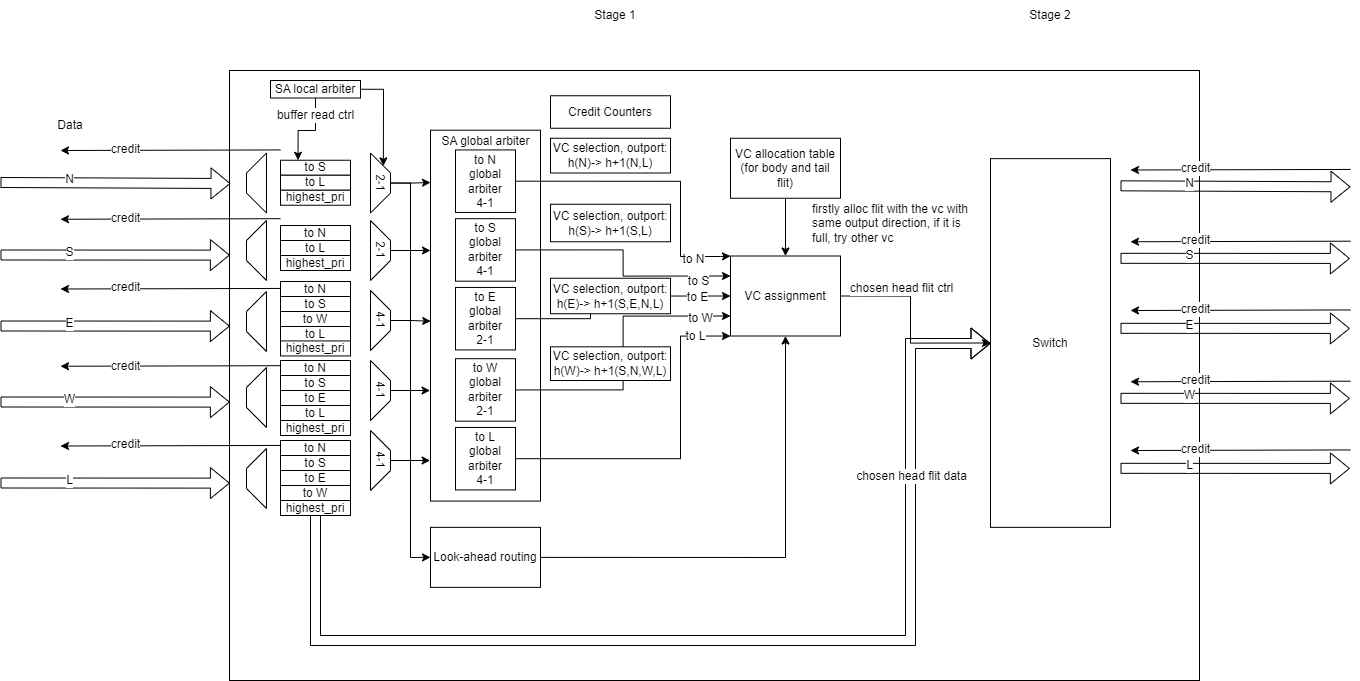

### Router Microarchitecture
#### 1. Features:
* 2-stage pipeline.
* credited-based flow control.
* Vitrual channel(VC) for QoS and switch allocation efficiency.
* The allocation priority of VC is based on look-ahead routing result.
* 2-level switch allocation, based on fair round-robin algorithm.
* Look-ahead routing for next hop router for better timing and VC allocation.
* Decoupled VC selection from VC allocation for better timing.

### Routing Algorithm
#### 1. X-Y routing

Use X-Y routing: 
Flits firstly go through X axis, then go though Y axis:

  * 1st phase: Assign next address
  * 2nd phase: Define new Next-port
  
Routing directions are referred to by the mesh port that the NoC routes the flit through. For
example, if the NoC routes the flit northwards, then the flit is sent through the north mesh port.

If there is a mismatch between the target NoC XID and the current NoC XID, then the NoC uses
the following rule to decide the routing direction:

  * If target NoC XID > current NoC XID, then route eastwards
  * Otherwise, route westwards

If the target NoC XID and the current NoC XID match, then the flit routing components are
compared against the YID of the NoC. If YIDs do not match, then the NoC uses the following rule
to decide the routing direction:

  * If target NoC YID > current NoC YID, then route northwards
  * Otherwise, route southwards

If the target NoC XID and YID match the current NoC XID and YID, then the flit has reached the
target NoC. At this point, the flit is downloaded to the target device.
#### 2. Look-ahead Routing

The routing result is calculated at last hop router or local onput port, to achieve better timing and VC allocation.
#### 3. Input VC Port
* Use Fixed VC Assignment with Dynamic VC Allocation (FVADA) mechanism. The input VCs are associated with the flits' output port.
* XY routing, so some of the output port are not used in some input ports.

* VC in each input port:

| input port | input port id | VC id | priority be assigned output port | output port id |
| ---------- | ------------- | ----- | -------------------------------- | -------------- |
| N          | 0             | 0     | S                                | 1              |
|            |               | 1     | L                                | 4              |
| S          | 1             | 0     | N                                | 0              |
|            |               | 1     | L                                | 4              |
| E          | 2             | 0     | N                                | 0              |
|            |               | 1     | S                                | 1              |
|            |               | 2     | W                                | 3              |
|            |               | 3     | L                                | 4              |
| W          | 3             | 0     | N                                | 0              |
|            |               | 1     | S                                | 1              |
|            |               | 2     | E                                | 2              |
|            |               | 3     | L                                | 4              |
| L          | 4             | 0     | N                                | 0              |
|            |               | 1     | S                                | 1              |
|            |               | 2     | E                                | 2              |
|            |               | 3     | W                                | 3              |
#### 4 Switch Allocation

Use two-stage input-port-first allocation.

##### 4.1 Local allocation
Use round-robin arbition. As XY routing, the local arbiters' input port number are not the same.

##### 4.2 Global allocation

Use round-robin arbition. As XY routing, the global arbiters' input port number are not the same.

* input output port mapping for each SA global arbiter:

| output port | global SA arbiter connected input ports | global SA arbiter connected input ports id | next hop input port |
| ----------- | --------------------------------------- | ------------------------------------------ | ------------------- |
| N           | S                                       | 1                                          | S                   |
|             | E                                       | 2                                          |                     |
|             | W                                       | 3                                          |                     |
|             | L                                       | 4                                          |                     |
| S           | N                                       | 0                                          | N                   |
|             | E                                       | 2                                          |                     |
|             | W                                       | 3                                          |                     |
|             | L                                       | 4                                          |                     |
| E           | W                                       | 3                                          | W                   |
|             | L                                       | 4                                          |                     |
| W           | E                                       | 2                                          | E                   |
|             | L                                       | 4                                          |                     |
| L           | N                                       | 0                                          | -                   |
|             | S                                       | 1                                          |                     |
|             | E                                       | 2                                          |                     |
|             | W                                       | 3                                          |                     |

### Qos (Quality of Service) Support
#### 1. Features:
* Each flit supports a flit QoS value of 0-15, and the larger the value, the higher the priority.
* Perform fair round robin arbitration on flits with the same priority.
* If an input port is not sent out after several cycles by the flit selected by round robin, another flit with the same priority will participate in the arbitration, reducing head of line blocking and improving arbitration efficiency.
* Support to put the flits that need the same router output port on the same virtual channel first, reduce head of line blocking, and improve arbitration efficiency.
* Supports assigning a dedicated virtual channel to the flit with the highest QoS priority to ensure the lowest latency and can be used for real-time applications.
* The QoS value of each flit is given by the request node when sending req. Currently it is a fixed value given according to the flit type. In the future, it is planned to support dynamic QoS value setting strategies based on transaction latency and requester throughput respectively.
#### 2. Common QoS
  No special VC, all VC head flits ranked by QoS value.
  * no extra real-time VC; 
  * no bypass arbiter for real-time VC; 
  * all VC involve QoS value compare.

#### 3. Common QoS + extra real-time VC QoS
  Add special VC for highest priority flits, all VC head flits ranked by QoS value.
  * have extra real-time VC; 
  * no bypass arbiter for real-time VC; 
  * the real-time VC always win the local sa, and the local sa rr point should not be updated
  * the real-time VC join global sa as common QoS, as it has highest QoS value, it can beat flits with other QoS value;
  * all VC involve QoS value compare.

### NOC Interface
This NoC uses CHI compatible interface. It defines 4 channels for different kinds of messages. Each channel is implemented in a specific physical sub-networks, so the NoC has 4 sub-networks. Each router can be configured to have several local port(s).

#### 1. Channel
In this specification, the Link layer provides a set of channels for flit communication.

Each channel has a defined flit format that has multiple fields and some of the field widths have multiple possible values. In some cases, the defined flit format can be used on both an inbound and an outbound channel.

Table below shows the channels, and the mapping onto the Request Node, Home Node and Subordinate Node component channels.

| Channel | Description                                                                                                                                 | Usage                                                           | RN Channel | HN Channel | SN Channel |
| ------- | ------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------- | ---------- | ---------- | ---------- |
| REQ     | The request channel transfers flits associated with request messages such as Read requests and Write requests.                              | Requests from RN to HN                                          | TXREQ      | RXREQ      | -          |
|         |                                                                                                                                             | Requests from RN to SN                                          | TXREQ      | -          | RXREQ      |
|         |                                                                                                                                             | Requests from HN to SN                                          | -          | TXREQ      | RXREQ      |
| RSP     | The response channel transfers flits associated with response messages that do not have a data payload such as write completion messages.   | Responses from SN to HN                                         | -          | RXRSP      | TXRSP      |
|         |                                                                                                                                             | Responses from SN to RN                                         | RXRSP      |            | TXRSP      |
|         |                                                                                                                                             | Responses from HN to RN                                         | RXRSP      | TXRSP      | -          |
|         |                                                                                                                                             | Snoop Response and Completion Acknowledge from snoopee RN to HN | TXRSP      | RXRSP      | -          |
| SNP     | The snoop channel transfers flits associated with Snoop Request messages.                                                                   | Snoop Requests from HN to snoopee RN                            | RXSNP      | TXSNP      | -          |
| DAT     | The data channel transfers flits associated with protocol messages that have a data payload such as read completion and WriteData messages. | WriteData, and Snoop response data from an RN to HN             | TXDAT      | RXDAT      | -          |
|         |                                                                                                                                             | WriteData from an RN to SN                                      | TXDAT      | -          | RXDAT      |
|         |                                                                                                                                             | WriteData from an HN to SN                                      | -          | TXDAT      | RXDAT      |
|         |                                                                                                                                             | Read data from SN to RN                                         | RXDAT      | -          | TXDAT      |
|         |                                                                                                                                             | Read data from SN to HN                                         | -          | RXDAT      | TXDAT      |
|         |                                                                                                                                             | Read data from HN to RN                                         | RXDAT      | TXDAT      | -          |

Table below shows the channels of Request Node, Home Node and Subordinate Node component have.

| Component | TXREQ | RXREQ | TXRSP | RXRSP | TXSNP | RXSNP | TXDAT | RXDAT |
| --------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| RN        | Y     | -     | Y     | Y     | -     | Y     | Y     | Y     |
| HN        | Y     | Y     | Y     | Y     | Y     | -     | Y     | Y     |
| SN        | -     | Y     | Y     | -     | -     | -     | Y     | Y     |

#### 2. Port
Table below shows the links of each router (and channel) port.

| Name                         | Direction | Type                                                   | Description                                        |
| :--------------------------- | :-------- | :----------------------------------------------------- | :------------------------------------------------- |
| rx_flit_pend_i               | in        | wire [INPUT_PORT_NUM-1:0] logic                        | input from other router or local port // N,S,E,W,L |
| rx_flit_v_i                  | in        | wire [INPUT_PORT_NUM-1:0] logic                        |                                                    |
| rx_flit_i                    | in        | wire [INPUT_PORT_NUM-1:0] flit_payload_t               |                                                    |
| rx_flit_vc_id_i              | in        | wire [INPUT_PORT_NUM-1:0] [VC_ID_NUM_MAX_W-1:0] logic  |                                                    |
| rx_flit_look_ahead_routing_i | in        | wire [INPUT_PORT_NUM-1:0] rvh_noc_pkg::io_port_t       |                                                    |
| tx_flit_pend_o               | out       | [OUTPUT_PORT_NUM-1:0] logic                            | output to other router or local port // N,S,E,W,L  |
| tx_flit_v_o                  | out       | [OUTPUT_PORT_NUM-1:0] logic                            |                                                    |
| tx_flit_o                    | out       | [OUTPUT_PORT_NUM-1:0] flit_payload_t                   |                                                    |
| tx_flit_vc_id_o              | out       | [OUTPUT_PORT_NUM-1:0] [VC_ID_NUM_MAX_W-1:0] logic      |                                                    |
| tx_flit_look_ahead_routing_o | out       | [OUTPUT_PORT_NUM-1:0] rvh_noc_pkg::io_port_t           |                                                    |
| rx_lcrd_v_o                  | out       | [INPUT_PORT_NUM-1:0] logic                             | free VC credit sent to sender                      |
| rx_lcrd_id_o                 | out       | [INPUT_PORT_NUM-1:0] [VC_ID_NUM_MAX_W-1:0] logic       |                                                    |
| tx_lcrd_v_i                  | in        | wire [OUTPUT_PORT_NUM-1:0] logic                       | free VC credit received from receiver              |
| tx_lcrd_id_i                 | in        | wire [OUTPUT_PORT_NUM-1:0] [VC_ID_NUM_MAX_W-1:0] logic |                                                    |
| node_id_x_ths_hop_i          | in        | wire [NodeID_X_Width-1:0] logic                        | router addr                                        |
| node_id_y_ths_hop_i          | in        | wire [NodeID_Y_Width-1:0] logic                        |                                                    |
| clk                          | in        | wire logic                                             |                                                    |
| rstn                         | in        | wire logic                                             |                                                    |

#### 3. Flit packet definitions
Refer to IHI0050F_amba_chi_architecture_spec Flit packet definitions. This part illustrates the definition of the variable length portion of the CHI flit for this design.
##### 3.1 Request flit
| Field                   | Field width                       | Comment                                   |
| ----------------------- | --------------------------------- | ----------------------------------------- |
| QoS                     | 4                                 | -                                         |
| TgtID                   | 7                                 | Width determined by NodeID_Width          |
| SrcID                   | 7                                 | Width determined by NodeID_Width          |
| TxnID                   | 12                                | -                                         |
| ReturnNID or            | 7                                 | Used for DMT                              |
| StashNID or             |                                   | Used in Stash transactions                |
| {(NodeID_Width - 7)'b0, |                                   | SBZ                                       |
| SLCRepHint[6:0]}        |                                   | Used in cache line replacement algorithms |
| StashNIDValid           | 1                                 | Used in Stash transactions                |
| Endian                  |                                   | Used in Atomic transactions               |
| Deep                    |                                   | Used in CleanSharedPersist* transactions  |
| ReturnTxnID[11:0]       | 12                                | Used for DMT                              |
| {6'b0,                  |                                   | SBZ                                       |
| StashLPIDValid,         |                                   | Used in Stash transactions                |
| StashLPID[4:0]}         |                                   | Used in Stash transactions                |
| Opcode                  | 7                                 | -                                         |
| Size                    | 3                                 | -                                         |
| Addr                    | RAW = 44 to 52                    | Width determined by Req_Addr_Width (RAW)  |
| NS                      | 1                                 | -                                         |
| NSE                     | 1                                 | -                                         |
| LikelyShared            | 1                                 | -                                         |
| AllowRetry              | 1                                 | -                                         |
| Order                   | 2                                 | -                                         |
| PCrdType                | 4                                 | -                                         |
| MemAttr                 | 4                                 | -                                         |
| SnpAttr or              | 1                                 | -                                         |
| DoDWT                   |                                   | Used for DWT                              |
| PGroupID[7:0] or        | 8                                 | Used in Persistent CMO transactions       |
| StashGroupID[7:0] or    |                                   | Used in the StashOnceSep transaction      |
| TagGroupID[7:0] or      |                                   | Used for Memory Tagging                   |
| {3'b0,                  |                                   | SBZ                                       |
| LPID[4:0]}              |                                   | -                                         |
| Excl                    | 1                                 | Used in Exclusive transactions            |
| SnoopMe                 |                                   | Used in Atomic transactions               |
| CAH                     |                                   | Used in CopyBack Write transactions       |
| ExpCompAck              | 1                                 | -                                         |
| TagOp                   | 2                                 | -                                         |
| TraceTag                | 1                                 | -                                         |
| MPAM                    | M = 0                             | No MPAM bus                               |
|                         | M = 12                            | -                                         |
| PBHA                    | PB = 0                            | No PBHA bus                               |
|                         | PB = 4                            | -                                         |
| RSVDC                   | Y = 0                             | No RSVDC bus                              |
|                         | Y = 4, 8, 12, 16, 24, 32          | -                                         |
| Total                   | R = (88 + RAW + Y + M + PB) = 132 | RAW = 44, Y = 0, M = 0, PB = 0            |


##### 3.2 Response flit

| Field                 | Field width | Comment                             |
| --------------------- | ----------- | ----------------------------------- |
| QoS                   | 4           | -                                   |
| TgtID                 | 7           | Width determined by NodeID_Width    |
| SrcID                 | 7           | Width determined by NodeID_Width    |
| TxnID                 | 12          | -                                   |
| Opcode                | 5           | -                                   |
| RespErr               | 2           | -                                   |
| Resp                  | 3           | -                                   |
| FwdState[2:0] or      | 3           | Used for DCT                        |
| DataPull[2:0]         |             | Used in Stash transactions          |
| CBusy                 | 3           | -                                   |
| DBID[11:0] or         | 12          | -                                   |
| {4'b0,                |             | SBZ                                 |
| PGroupID[7:0]} or     |             | Used in Persistent CMO transactions |
| {4'b0,                |             | SBZ                                 |
| StashGroupID[7:0]} or |             | Used in Stash transactions          |
| {4'b0,                |             | SBZ                                 |
| TagGroupID[7:0]}      |             | Used for Memory Tagging             |
| PCrdType              | 4           | -                                   |
| TagOp                 | 2           | -                                   |
| TraceTag              | 1           | -                                   |
| Total                 | T = 65      | -                                   |

##### 3.3 Snoop flit

| Field                  | Field width             | Comment                          |
| ---------------------- | ----------------------- | -------------------------------- |
| QoS                    | 4                       | -                                |
| SrcID                  | 7                       | Width determined by NodeID_Width |
| TxnID                  | 12                      | -                                |
| FwdNID or              | 7                       | Width determined by NodeID_Width |
| {(NodeID_Width - 4)'0, |                         |                                  |
| PBHA[3:0]}             |                         |                                  |
| FwdTxnID[11:0] or      | 12                      | Used for DCT                     |
| {6'b0,                 |                         | SBZ                              |
| StashLPIDValid         |                         | Used in Stash transactions       |
| StashLPID[4:0]} or     |                         | Used in Stash transactions       |
| {4'b0,                 |                         | SBZ                              |
| VMIDExt[7:0]}          |                         | Used in DVM transactions         |
| Opcode                 | 5                       | -                                |
| Addr                   | SAW = 41 to 49          | Req_Addr_Width - 3               |
| NS                     | 1                       | -                                |
| NSE                    | 1                       | -                                |
| DoNotGoToSD            | 1                       | -                                |
| RetToSrc               | 1                       | -                                |
| TraceTag               | 1                       | -                                |
| MPAM                   | M = 0                   | No MPAM bus                      |
|                        | M = 11                  | -                                |
| Total                  | S = (52 + SAW + M) = 93 | SAW = 41, M = 0                  |

##### 3.4 Data flit

| Field                   | Field width                   | Comment                             |
| ----------------------- | ----------------------------- | ----------------------------------- |
| QoS                     | 4                             | -                                   |
| TgtID                   | 7                             | Width determined by NodeID_Width    |
| SrcID                   | 7                             | Width determined by NodeID_Width    |
| TxnID                   | 12                            | -                                   |
| HomeNID or              | 7                             | Width determined by NodeID_Width    |
| {(NodeID_Width - 4)'b0, |                               |                                     |
| PBHA[3:0]}              |                               |                                     |
| Opcode                  | 4                             | -                                   |
| RespErr                 | 2                             | -                                   |
| Resp                    | 3                             | -                                   |
| DataSource[4:0] or      | 5                             | Indicates Data source in a response |
| {2'b0,                  |                               | SBZ                                 |
| FwdState[2:0]} or       |                               | Used for DCT                        |
| {2'b0,                  |                               | SBZ                                 |
| DataPull[2:0]}          |                               | Used in Stash transactions          |
| CBusy                   | 3                             | -                                   |
| DBID[11:0]              | 12                            | -                                   |
| CCID                    | 2                             | -                                   |
| DataID                  | 2                             | -                                   |
| TagOp                   | 2                             | -                                   |
| Tag                     | DW/32 = 4, 8, 16              | -                                   |
| TU                      | DW/128 = 1, 2, 4              | -                                   |
| TraceTag                | 1                             | -                                   |
| CAH                     | 1                             | -                                   |
| RSVDC                   | Y = 0                         | No RSVDC bus                        |
|                         | Y = 4, 8, 12, 16, 24, 32      | -                                   |
| BE                      | DW/8 = 16, 32, 64             | -                                   |
| Data                    | DW = 128, 256, 512            | DW = Data bus width                 |
| DataCheck (DC)          | 0 or DW/8 = 16, 32, 64        | -                                   |
| Poison (P)              | 0 or DW/64 = 2, 4, 8          | -                                   |
| Total                   | D = (223 to 235) + Y + DC + P | DW = 128 bit Data                   |
|                         | D = (372 to 384) + Y + DC + P | DW = 256 bit Data                   |
|                         | D = (670 to 682) + Y + DC + P | DW = 512 bit Data                   |
|                         | D = 223 + Y + DC + P = 223    | DW = 128, Y = 0, DC = 0, P = 0      |
|                         | D = 372 + Y + DC + P = 372    | DW = 128, Y = 0, DC = 0, P = 0      |


## Peripheral Devices
<a name="5"></a>
Compared to RainbowRio v1.0, RainbowRio v2.0 serves as a complete SoC generator, which provides several types of devices, including uart/gpio/i2c/spi. Up to sixteen devices can be mounted on the SoC. A System Verilog file `perips_top.sv` that modulars the peripheral devices on the SoC will be generated according to the configuration json file.
In the file `soc_config.json` the local devices are configured. The functions are illustrated in configuration option section.

### Diagram
![][peripheral_diagram]

### Bus
GreenRio uses wishbone bus as on-chip bus.

|port   | description|
| :---: | :---------:|
|cyc	| indicates that a valid bus cycle is in progress. |
|stb	| chipselect: indicates a valid data transfer cycle. |
|we	    | indicates whether the current local bus cycle is a READ or WRITE cycle.|
|ack	| indicates the termination of a normal bus cycle by slave device.|
|sel    | select which byte is effective. | 
|wdata  | the data to be written to slave machine. |
|rdata  | read data responsed by slave machine. |
|addr   | indicates the target address to be read / written. |

See detaild introduction in [WISHBONE SoC INterconnection Architecture for Portable IP Cores](https://cdn.opencores.org/downloads/wbspec_b4.pdf).

### Register mapping
Due to the variable number of different devices, the reigister mapping is also dynamic. We assign the register addresses as the following rules:
1. The clint register addresses' highest 8bit is 0x03. With the difference in core's id, different core's clint register is different in 8-11 bit. Each core's correspondnig clint register's address is different in 0-7 bit. 
    ```
    For example, CORE_0_MTIMECMP_ADDR is 32'h0300_0000, and CORE_0_MTIME_ADDR is 32'h0300_0001. They are different in 0-7 bit. CORE_1_MTIMECMP_ADDR is 32'h0300_0100, it is different with CORE_0_MTIMECMP_ADDR in 8-11 bit.
    ```
    The detailed clint register will be illustrated in the next section.
2. The peripheral devices register addresses' highest 8bit is 0x02. In RainbowRio2 we define device id as the sequence uart < gpio < i2c < spi.
    ```
    If user want to modular 2 uart, 1 gpio, 2 i2c and 1 spi on the Soc, device ids are as follows: uart_0 | 0, uart_1 | 1, gpio_0 | 2, i2c_0 | 3, i2c_1 | 4, spi_0 | 5.
    ```
    Each device's register address vary in 0-7 bit, and the device id lies in 9-11 bit, that's why RainbowRio2 supports up to 16 devices.
    ```
    Carrying on from the above example, UART_0_TX_DATA_ADDR is 32'h0200_0000, and UART_0_RX_DATA_ADDR is 32'h0200_0001. They are different 0-7 bit. UART_1_TX_DATA_ADDR is 32'h0200_0100, it is different with UART_0_TX_DATA_ADDR in 8-11 bit. SPI's device id is 5, therefore SPI_1_CFG_DATA_ADDR is 32'h0200_0b00.
    ```
    The detailed device register will be illustrated in the device introduction section.


### Device introduction

#### UART
##### Diagram
![][uart_message_structure_tag]

##### Registers
|    register    |   address   |    description         |
| :------: | :---------- | :------------------- | 
| UART_TX_DATA_ADDR  | 00 | [7:0] is used <br> write to this address to fill the byte to be sent by  |
|  UART_RX_DATA_ADDR | 01 | [7:0] is used |
| UART_TX_CTRL_ADDR | 02 | [2] output interrupt enable <br> [1] 1 - two bit stop; 0 - one bit stop <br> [0] output enable |
| UART_RX_CTRL_ADDR | 03 | [31:29] control interrupt watermark <br> [28:26] elements number in read_fifo <br> [2] input interrupt enable <br> [0] input enable |

##### Interrupt mechanism
    if the number of receiving elements is more than interrupt watermark, it will trigger interrupt.

#### GPIO

##### Diagram
![][gpio_tag]

##### Registers
|    register    |   address   |    description         |
| :------: | :---------- | :------------------- | 
| GPIO_VALUE_ADDR  | 00 |  the gpio input value |
| GPIO_INPUT_EN_ADDR | 01 | [0]: input enable (if input enable is off, GPIO is in output mode)<br> [1]: interrupt enable |
| GPIO_PORT_ADDR | 03 |  output value |

##### Interrupt mechanism
    If input_enable is on and an edge change is detected, triggering an interrupt.

#### TESTIO
Testio is a single-direction uart-like tool serving as an extra master used to debug. It is initialized by the input reset signal and works under input clock. We use this tool to read Soc status and tune some register value.

##### Diagram
![][testio_fsm_tag]

##### Message structure
![][testio_1bit_tag]

#### PLIC
The PLIC treats each interrupt target independently and does not take into account any interrupt prioritization scheme used by a component that contains multiple interrupt targets. As a result, the PLIC provides no concept of interrupt preemption or nesting so this must be handled by the cores hosting multiple interrupt target contexts.

##### Diagram
![][plic_tag]

##### Registers
|    register    |   address   |    description                |
| :------: | :---------- | :------------------- | 
| priority  | assigned to each device, following the device inherent registers | High priority interrupt can be issued first. |
| ip | assigned to each device, following the device inherent registers | After one interrupt issued， its corresponding IP register rises, until core read interrupt interrupt source identification to pull down it. |
| irq_enable | assigned to each device, following the device inherent registers | whether the interrupt enable |
| irq_threshold | 06 (assigned to each core) | if interrupt priority is higher than that value, then interrupt can be issued. |
| irq_response | 07 (assigned to each core) | Core generates a read request for this register to response external interrupt, value is interrupt source's ID|
| irq_complete | 08 (assigned to each core) | After core handle present interrupt, it will write corresponding ID to this register to release corresponding gateway. |
    All of the above registers are defined as macro in `perips_cfg.vh` file, users can generate this file and write program under the guiding.

#### CLINT

##### Registers
|    register    |   address   |    description                |
| :------: | :---------- | :------------------- | 
| mtimecmp  | 00  | if mtime > mtimecmp, trigger machine timer interrupt |
| stimecmp  | 01  | if stime > stimecmp, trigger supervisor timer interrupt |
| mtime | 02 | count time (synchronous with core) |
| stime | 03 | count time (synchronous with core) |
| msip | 04 | if msip[0] is written 1, generate machine software interrupt |
| ssip | 05 | if ssip[0] is written 1, generate supervisor software interrupt |

#### SPI

##### Diagram
SPI block diagram

![][spi_block_tag]

SPI message

![][spi_messgae_tag]

##### Registers
|    register    |   address   |    description                |
| :------: | :---------- | :------------------- | 
| SPI_CFG_DATA_ADDR  | 00  | [8] if zero, the CS pin is active <br> [7:0] data lines|

##### Interrupt mechanism 
The current spi on the Soc can only work as a master to send message, so it won't trigger an interrupt in default occasion. In the future, we will add slave function and add interrupt case when the sending message can't be accpeted normally.
#### I2C

##### Diagram

I2C message 

![][i2c_message_tag]

##### Registers
|    register    |   address   |    description                |
| :------: | :---------- | :------------------- | 
| I2C_CTR  | 00  | [7] enable i2c |
| I2C_TX  | 01  | [7:0] is used <br> write to this address to fill the byte to be sent by |
| I2C_RX | 02 | [7:0] is the received data |
| I2C_CR | 03 | [7] start transmitting STA <br> [6] start transmitting STO <br> [5] read RD from slave <br> [4] write WR [3] if ACK as receive, send ACK signal 0 or 1 |
| I2C_SR | 04 | [7] receive slave's ACK <br> [6] detects if the bus status is busy <br> [0] interrupt mark|

##### Interrupt mechanism
If the i2c works as a slave and receive a message without error from other devices, it will trigger an interrupt.


[spi_messgae_tag]: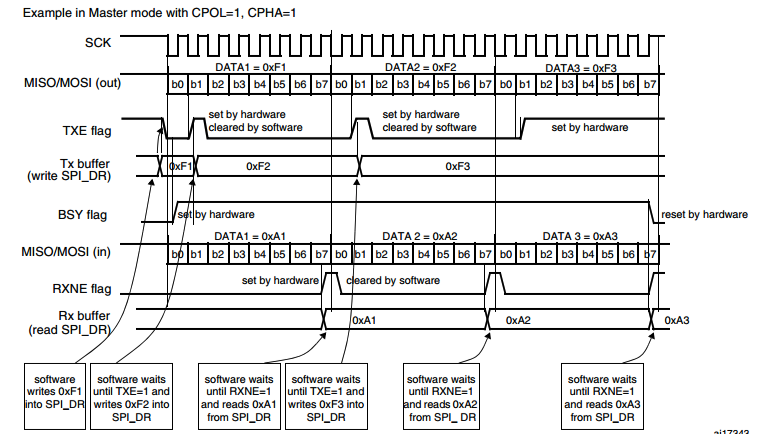

[spi_block_tag]: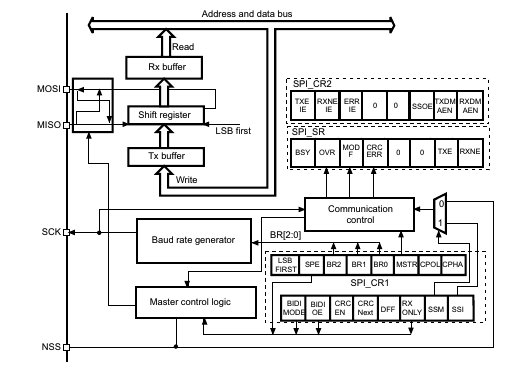

[i2c_message_tag]: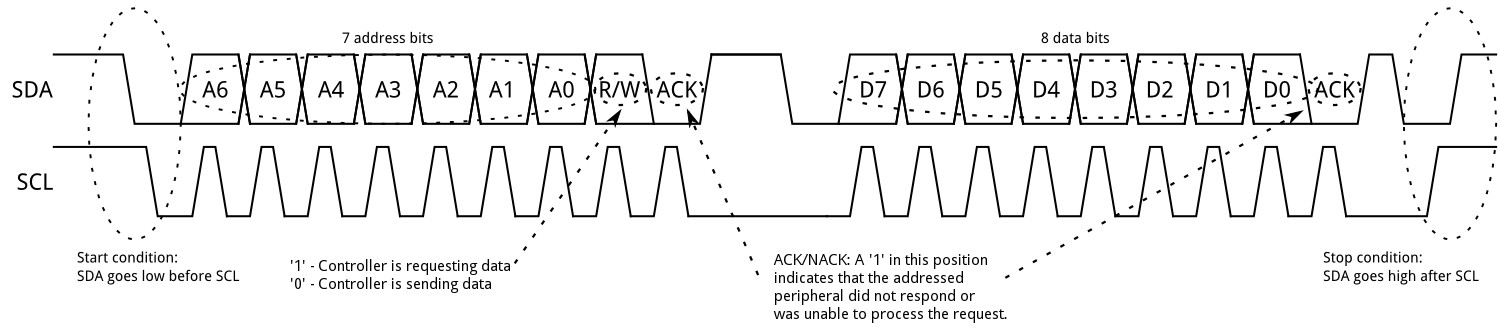

[plic_tag]: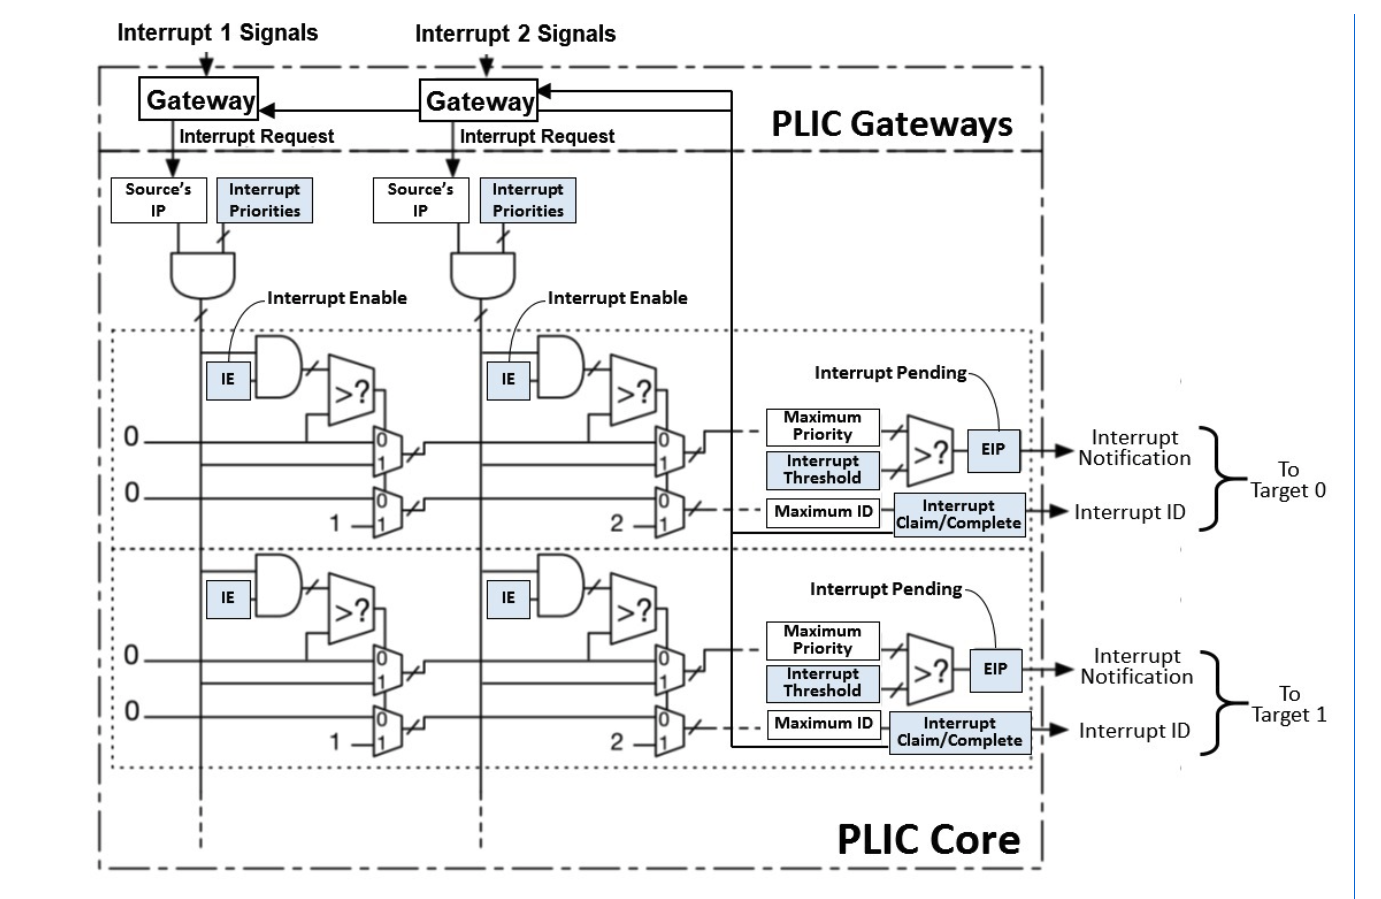

[testio_fsm_tag]: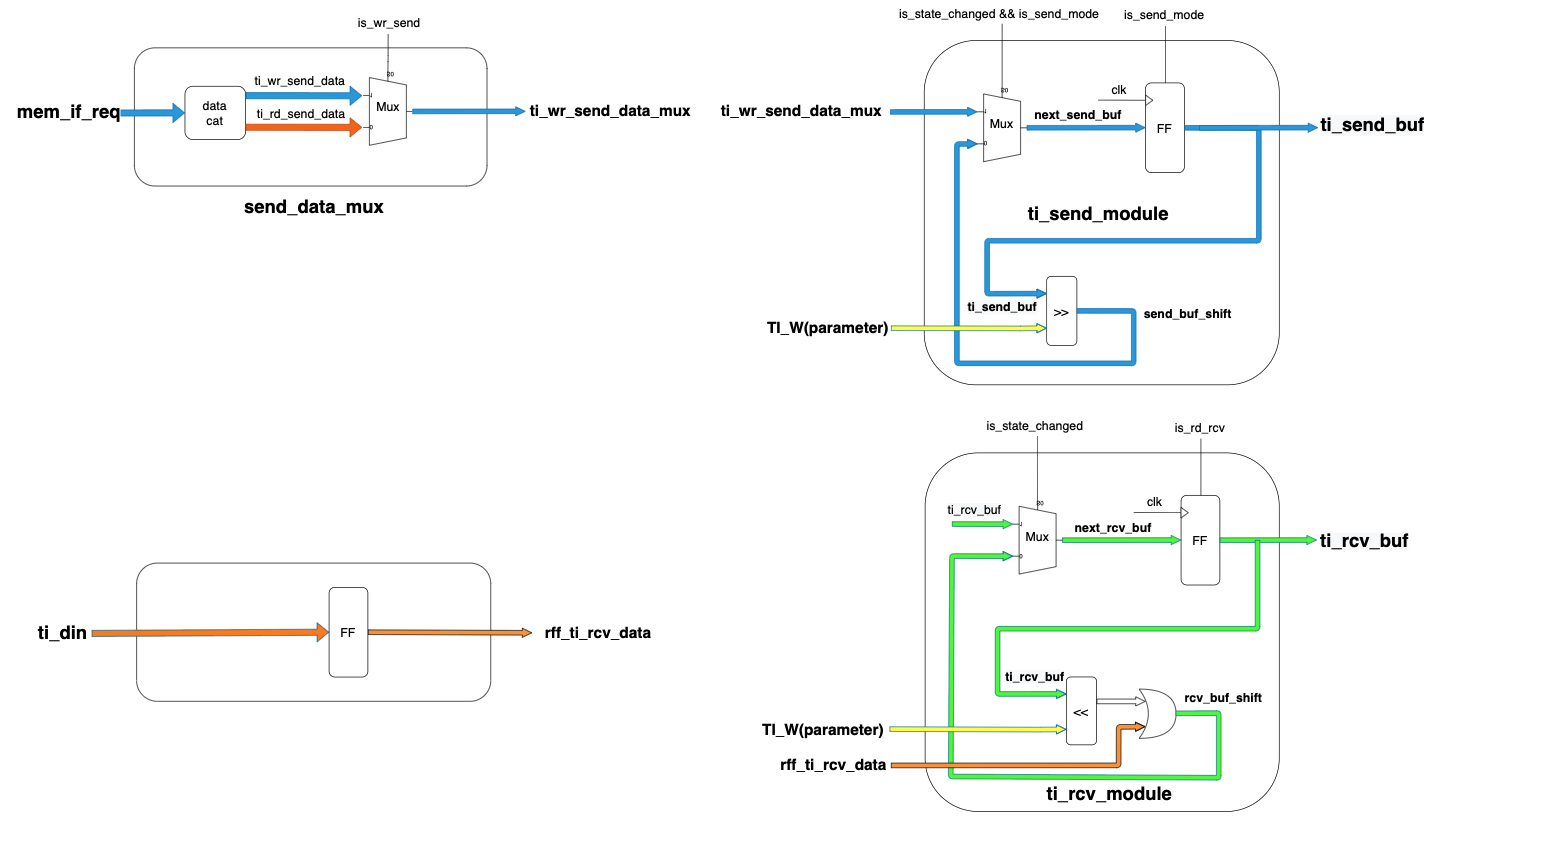


[testio_1bit_tag]: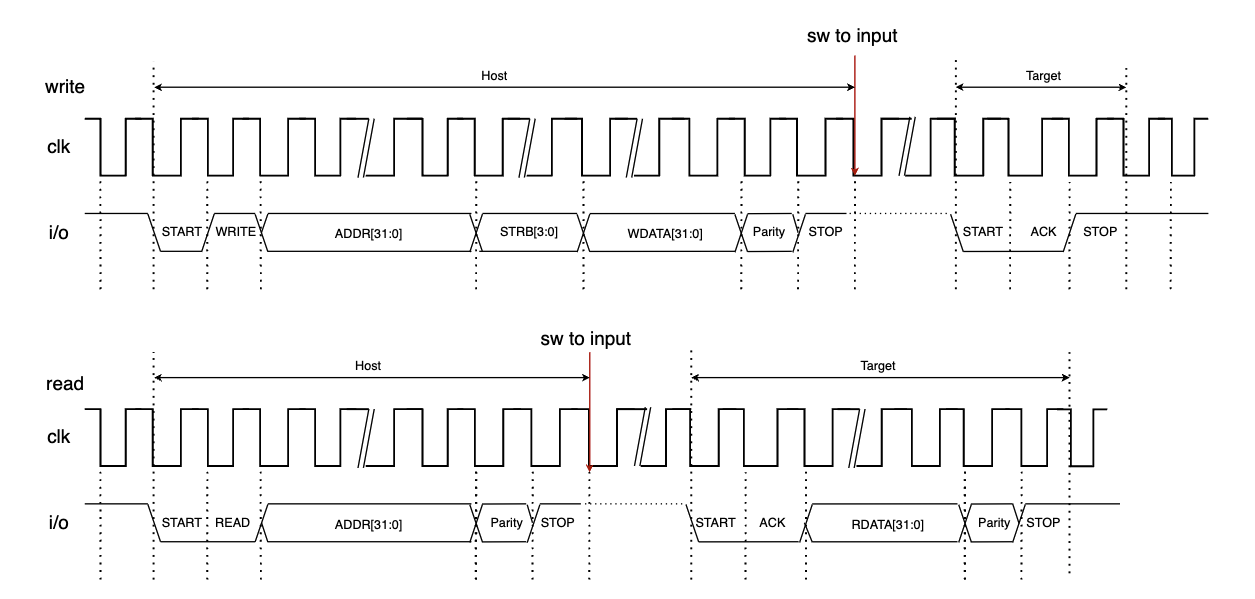

[gpio_tag]: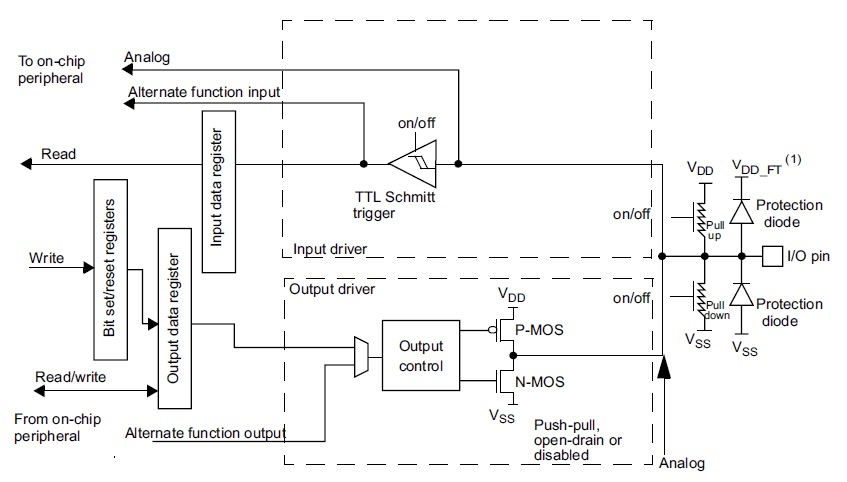

[uart_message_structure_tag]: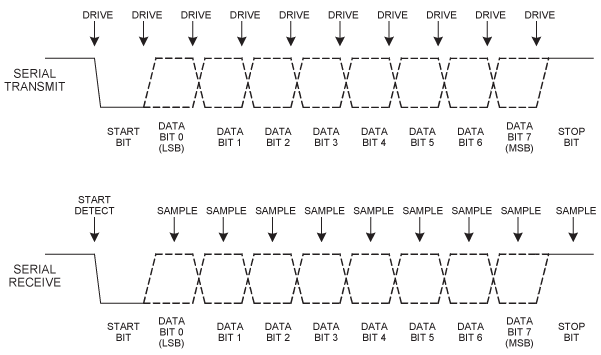

[peripheral_diagram]: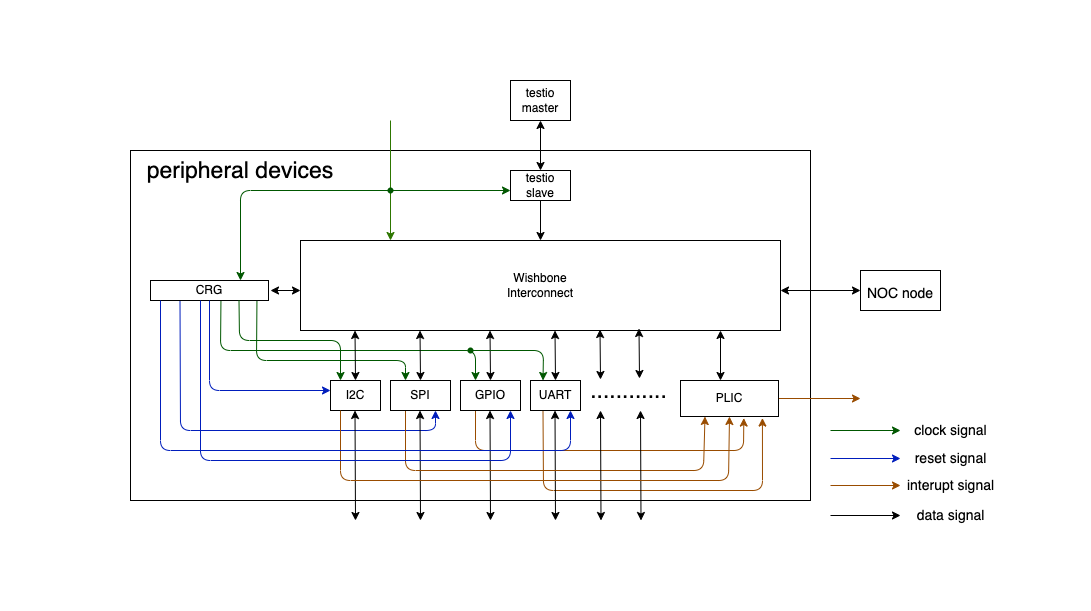 

## Cache Architecture
<a name="6"></a>
* The code of Cache is based on RainbowRio v1.0 which has already attended the ISSCC23-Code-A-Chip. 
* We optimized it, enhanced the performance, and connected it with the NoC and SoC to build a complete uncore framework.

### Cache Diagram

![][cache_tag]

### Cache bank diagram

![][cache_bank_tag]

### Cache features
* non-blocking cache

  * it can still accept requests when miss happens in the cache, because the mshr depth is greater than one, so it can also response the LSU out-of-order

* VIPT

  * it applies the virtual index and physical tag principle. at s0 stage, use virtual index to read all the way in tag and data ram. at s1 stage, mmu will send the physical tag of this request to cache, and compare with the output of tag ram. at s2 stage, if it is hit, response to LSU, if it is miss, send it to the MSHR.

* Multi-ports for LSU

  * to increase the performance of cache, it has multi-ports for the LSU requests. 

* Store-buffer

  * buffer store     : multiple stores may come into stb, th stb buffer them and send them to l1d bank at some timeout

  * store merge      : when different st req hit the same cache line, stb shoul merge them into one cache line, set its write mask, and send them to l1d bank as one write req

  * load bypass      : the st reqs in stb are commited, so it has latest data, when a load req comes, it has to search the stb for its data.
 
  * eviction         : when the eviction condition is met, e.g. stb full, load practial hit, the stb needs to evict one or all stb entries to l1d bank

  * coherence snoop  : snoop will search the stb, if there is a hit, it should wait for the stb entry being evicted to the l1d bank and then start its coherence operation

* Multi-banks

  * this cache has eight banks, each bank has only one request port and it is only responsible for the corresponding address.

* Support prefetch for fetch unit

  * cache line is 512bit, so in icache, multiple instructions can be fetched at one time, it is advantaged to the prefetch in fetch unit.

* Helical structure in data-ram

  * to decrease the power consumption, it use helical structure in the data ram, as shown in the below table, at s1 stage, the data ram should only be read out 512 bit data for four ways instead of 2048-bit data by using this fancy idea.
  

  | addr                 | data_ram_0| data_ram_1| data_ram_2| data_ram_3|
  | -------------------- | --------- | --------- | --------- | --------- |
  | {set_idx,line_seg=0} | way0_seg0 | way1_seg0 | way2_seg0 | way3_seg0 |
  | {set_idx,line_seg=1} | way3_seg1 | way0_seg1 | way1_seg1 | way2_seg1 |
  | {set_idx,line_seg=2} | way2_seg2 | way3_seg2 | way0_seg2 | way1_seg2 |
  | {set_idx,line seg=3} | way1_seg3 | way2_seg3 | way3_seg3 | way0_seg3 |


* MSHR, Line fill buffer and Evict queue

  * MSHR is used to store the miss request and send them to the next level memory by AR channel
  * Line fill buffer is used to store the data send back from next level momory by R channel and refill them to tag and data ram
  * Evict queue is used to store the data evicted by the tag and data ram, and then write back to the next level memory
  * in this cache, the depth of these three buffers are configurable.
 
* PLRU replace algorithm 

  * if the mapping structure of the cache is a W-way group connected mapping, that is, there are w cache lines in a set, tree PLRU will use the W - 1 bit to represent the binary tree of approximate access history order. According to the characteristics of the binary tree, tree PLRU divides the W cache lines into different blocks, and uses 0/1 to indicate the access time of the blocks.

[cache_tag]: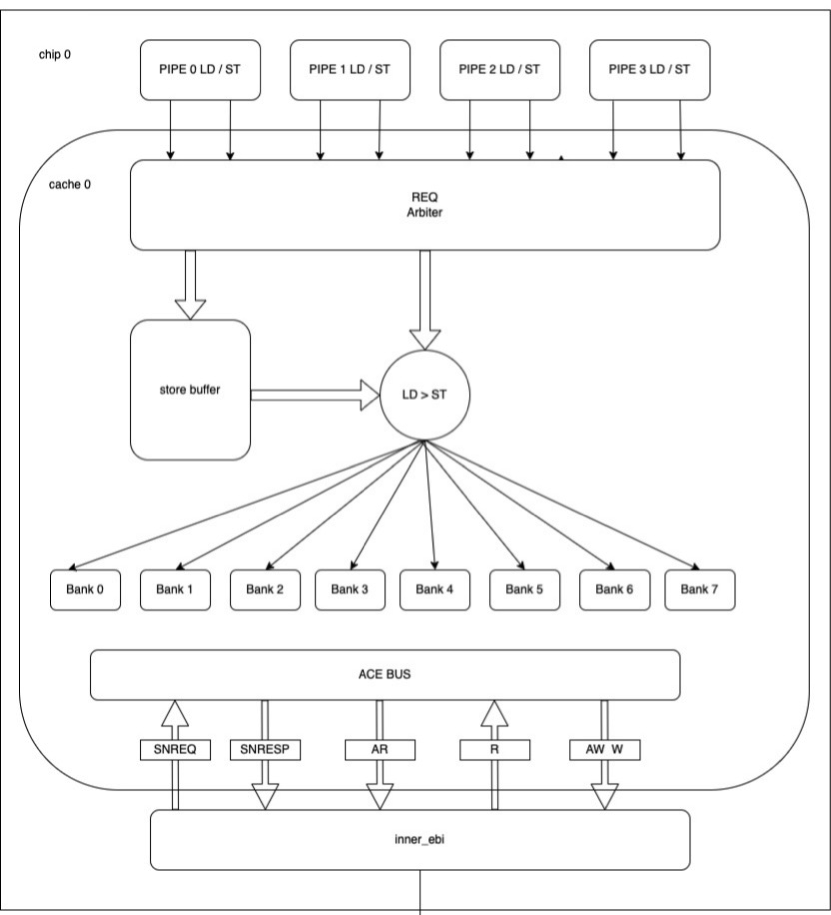

[cache_bank_tag]: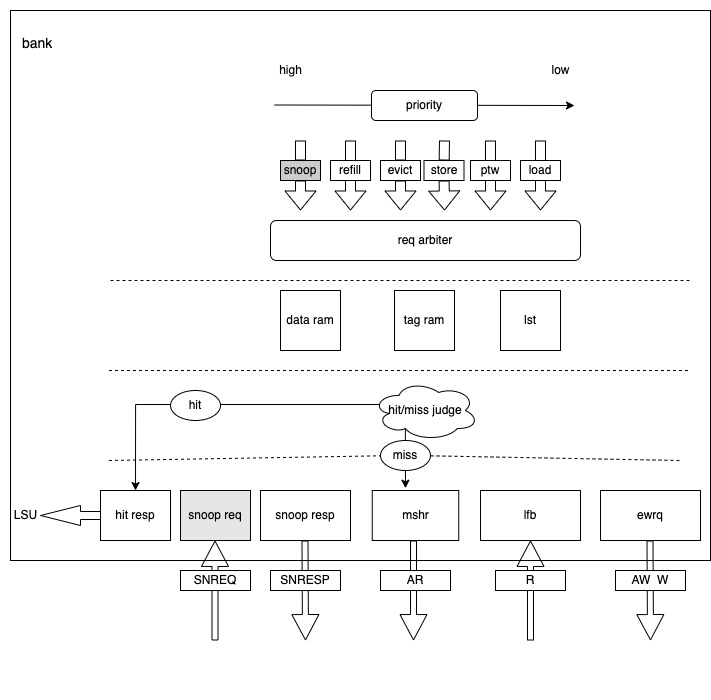

## RTL to GDSII Flow
<a name="7"></a>

### Install dependencies

In [ ]:
!unset  http_proxy  https_proxy  all_proxy
openlane_version = 'latest' #@param {type:"string"}
open_pdks_version = 'latest' #@param {type:"string"}

if openlane_version == 'latest':
  openlane_version = ''
if open_pdks_version == 'latest':
  open_pdks_version = ''

import os
import pathlib

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!CI=0 bin/micromamba install --yes --prefix $CONDA_PREFIX \
                     --channel litex-hub \
                     --channel main \
                     openlane={openlane_version} \
                     open_pdks.sky130a={open_pdks_version} \

!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel conda-forge \
                        tcllib gdstk pyyaml click
#!python -m pip install --no-binary gdstk gdstk
PATH = os.environ['PATH']
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}


                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

Empty environment created at prefix: /content/conda-env

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/


Pinned packages:
  - python 3.7*


Transaction

  Prefix: /content/conda-env

  Updating specs:

   - openlane=*
   - open_pdks.sky130a=*


  Package                              Version  Build                 Channel                 Size
────────────────────────────────────────────────────────────────────────────────────────────────────
  Install:
──────────────────────────────────────────

### Import source code

In [ ]:
!git clone https://github.com/wmz-max/RainbowRio.git 

Cloning into 'RainbowRio'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 305 (delta 72), reused 200 (delta 50), pack-reused 81
Receiving objects: 100% (305/305), 127.58 MiB | 26.86 MiB/s, done.
Resolving deltas: 100% (86/86), done.


### Run the RTL-GDS with the EDA parameters we configured
The example configuration is a 2x2 mesh with four routers and a small peripheral_top with one UART, one SPI and one I2C. Openlane will run the backend according to the parameters we have in soc_config.json. Because the backend flow time will exceed 6 hours(with larger noc scale and more complex soc the time will be longer),we have already pushed the flow results on github so that  we can skip to the next steps.

In [ ]:
%env PDK=sky130A
!flow.tcl -design RainbowRio -tag tb_mesh -config_file RainbowRio/eda.json

env: PDK=sky130A
OpenLane 2023.03.01_0_ge10820ec-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'RainbowRio/eda.json'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library: sky130_fd_sc_hd
[INFO]: Run Directory: /content/RainbowRio/runs/tb_mesh
[INFO]: Preparing LEF files for the nom corner...
[INFO]: Preparing LEF files for the min corner...
[INFO]: Preparing LEF files for the max corner...
[STEP 1]
[INFO]: Running Synthesis (log: RainbowRio/runs/tb_mesh/logs/synthesis/1-synthesis.log)...
[STEP 2]
[INFO]: Running Single-Corner Static Timing Analysis (log: RainbowRio/runs/tb_mesh/logs/synthesis/2-sta.log)...
[STEP 3]
[INFO]: Running Initial Floorplanning (log: RainbowRio/runs/tb_mesh/logs/floorplan/3-initial_fp.log)

#### Display layout

In [ ]:
!pip install matplotlib
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
##The current GDS size is too large, which takes too long to open in Python. We use Klayout to open and take a screenshot. If you want, you can also try to open it with klayout or the optimized Python script.
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
lena = mpimg.imread('RainbowRio/backend_result/gds.png') 
lena.shape [:3]
plt.imshow(lena) 
plt.axis('off') 
plt.show()

#### Dump flow report


In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
#reports = sorted(pathlib.Path('RainbowRio/runs/tb_mesh').glob('reports/metrics.csv'))
reports = sorted(pathlib.Path('RainbowRio/backend_result/').glob('metrics.csv'))
df = pd.read_csv(reports[-1])
df.transpose()

0
design                      /work/stu/yzhu/ai-chip/hehe_eda/RainbowRio
design_name                                                    tb_mesh
config                                                         tb_mesh
flow_status                                             flow completed
total_runtime                                               4h14m1s0ms
routed_runtime                                             0h35m12s0ms
(Cell/mm^2)/Core_Util                                      2397.111111
DIEAREA_mm^2                                                       9.0
CellPer_mm^2                                               1198.555556
OpenDP_Util                                                       1.46
Peak_Memory_Usage_MB                                          10580.94
cell_count                                                       10787
tritonRoute_violations                                               0
Short_violations                                                     0
MetSpc_violations                                                    0
OffGrid_violations                                                   0
MinHole_violations                                                   0
Other_violations                                                     0
Magic_violations                                                     0
antenna_violations                                                  16
lvs_total_errors                                                    -1
cvc_total_errors                                                    -1
klayout_violations                                                  -1
wire_length                                                    1041545
vias                                                             84279
wns                                                                0.0
pl_wns                                                             0.0
optimized_wns                                                      0.0
fastroute_wns                                                      0.0
spef_wns                                                           0.0
tns                                                                0.0
pl_tns                                                             0.0
optimized_tns                                                      0.0
fastroute_tns                                                      0.0
spef_tns                                                           0.0
HPWL                                                       860281485.0
routing_layer1_pct                                                 0.0
routing_layer2_pct                                                2.96
routing_layer3_pct                                                3.36
routing_layer4_pct                                                0.89
routing_layer5_pct                                                0.86
routing_layer6_pct                                                0.07
wires_count                                                      29989
wire_bits                                                       443015
public_wires_count                                               11738
public_wire_bits                                                424604
memories_count                                                       0
memory_bits                                                          0
processes_count                                                      0
cells_pre_abc                                                    20099
AND                                                                137
DFF                                                                  8
NAND                                                               421
NOR                                                                497
OR                                                                5340
XOR                                                                869
XNOR                  

## Design Verification
<a name="8"></a>
* 1. Install verilator and its dependecies
* 2. Verify the NoC correctness and show NoC performance
* 3. Verify the correctness of multi-cache connected with Coherence Fabric
* 4. Verify the correctness of peripherals

### Install verilator

In [ ]:
!sudo apt-get install git perl python3 make autoconf g++ flex bison ccache
!sudo apt-get install libgoogle-perftools-dev numactl perl-doc
!sudo apt-get install libfl2  # Ubuntu only (ignore if gives error)
!sudo apt-get install libfl-dev  # Ubuntu only (ignore if gives error)
!sudo apt-get install zlibc zlib1g zlib1g-dev  # Ubuntu only (ignore if gives error)
!git clone https://github.com/verilator/verilator   # Only first time

# Every time you need to build:
%cd verilator
!git pull         # Make sure git repository is up-to-date
!git checkout v4.224 

!autoconf         # Create ./configure script
!./configure      # Configure and create Makefile
!make -j `nproc`
!sudo make install
verilator_bin_path = pathlib.Path('bin')
VERILATOR_PATH = str(verilator_bin_path.resolve())
%env PATH={VERILATOR_PATH}:{PATH}
%cd ../

Reading package lists... Done
Building dependency tree       
Reading state information... Done
autoconf is already the newest version (2.69-11.1).
autoconf set to manually installed.
g++ is already the newest version (4:9.3.0-1ubuntu2).
g++ set to manually installed.
make is already the newest version (4.2.1-1.2).
make set to manually installed.
python3 is already the newest version (3.8.2-0ubuntu2).
python3 set to manually installed.
git is already the newest version (1:2.25.1-1ubuntu3.10).
perl is already the newest version (5.30.0-9ubuntu0.3).
perl set to manually installed.
The following additional packages will be installed:
  libfl-dev libfl2
Suggested packages:
  bison-doc distcc | icecc flex-doc
The following NEW packages will be installed:
  bison ccache flex libfl-dev libfl2
0 upgraded, 5 newly installed, 0 to remove and 23 not upgraded.
Need to get 1,112 kB of archives.
After this operation, 3,524 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubu

### NOC Verification

#### NOC Verification Diagram
* sender: it is connected to each router and send the generated request to routers as much as possible
* receiver: it is connected to each router and receive the request from different routers
* score_board: record the start time and receipt time of each request, compare received data and the sent data, check the correctness, calculate average noc latency and average bandwidth

![2.png][1_png]

[1_png]: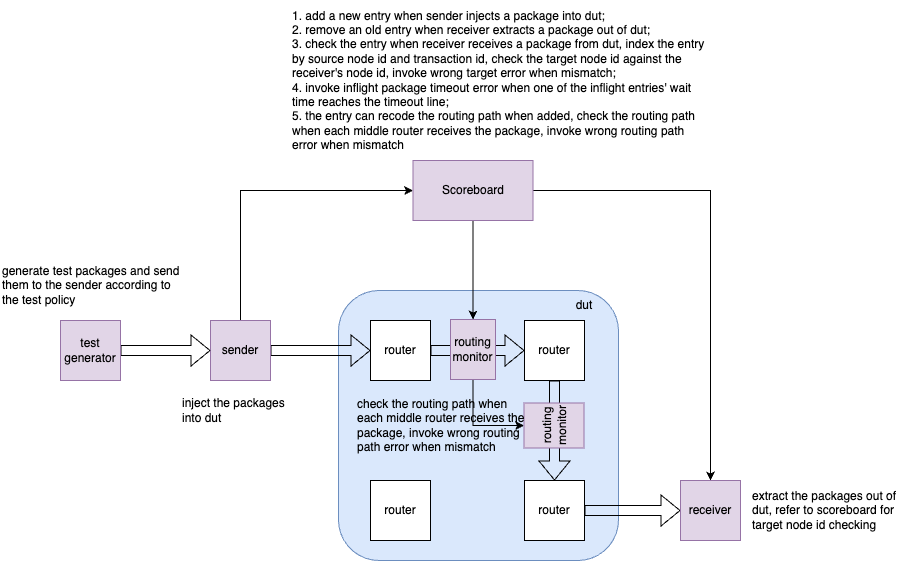

#### Run 3x3 mesh NOC verification(verilator)

In [ ]:
%cd ./RainbowRio/tb
!make verify_noc

流式输出内容被截断，只能显示最后 5000 行内容。
[              22] info: test_generator gen case to   sender: 13, [average_app_gen_bandwidth: 6.932358GBps], [average_app_bandwidth: 6.932358GBps]
[              22] info: test_generator gen case to   sender: 16, [average_app_gen_bandwidth: 7.283364GBps], [average_app_bandwidth: 7.283364GBps]
[              22] info: test_generator gen case to   sender: 17, [average_app_gen_bandwidth: 6.464351GBps], [average_app_bandwidth: 6.464351GBps]
[              22] info: test_generator gen case to   sender: 18, [average_app_gen_bandwidth: 7.868373GBps], [average_app_bandwidth: 7.868373GBps]
[              22] info: test_generator gen case to   sender: 21, [average_app_gen_bandwidth: 5.469835GBps], [average_app_bandwidth: 5.469835GBps]
[              22] info: test_generator gen case to   sender:all, [average_app_gen_bandwidth: 446.888483GBps], [average_app_bandwidth: 386.135283GBps]
[              22] info: test_generator gen case to   sender:  0, [average_app_gen_band

### Multi-cache connected with Coherence Fabric

#### Run multi-cache connected with Coherence Fabric
* To verify the correctness of Coherence Fabric, we connected four caches with it and used our Unit-Test to prove the correctness. It can pass our UT successfully.


![2.png][1_png]

[1_png]: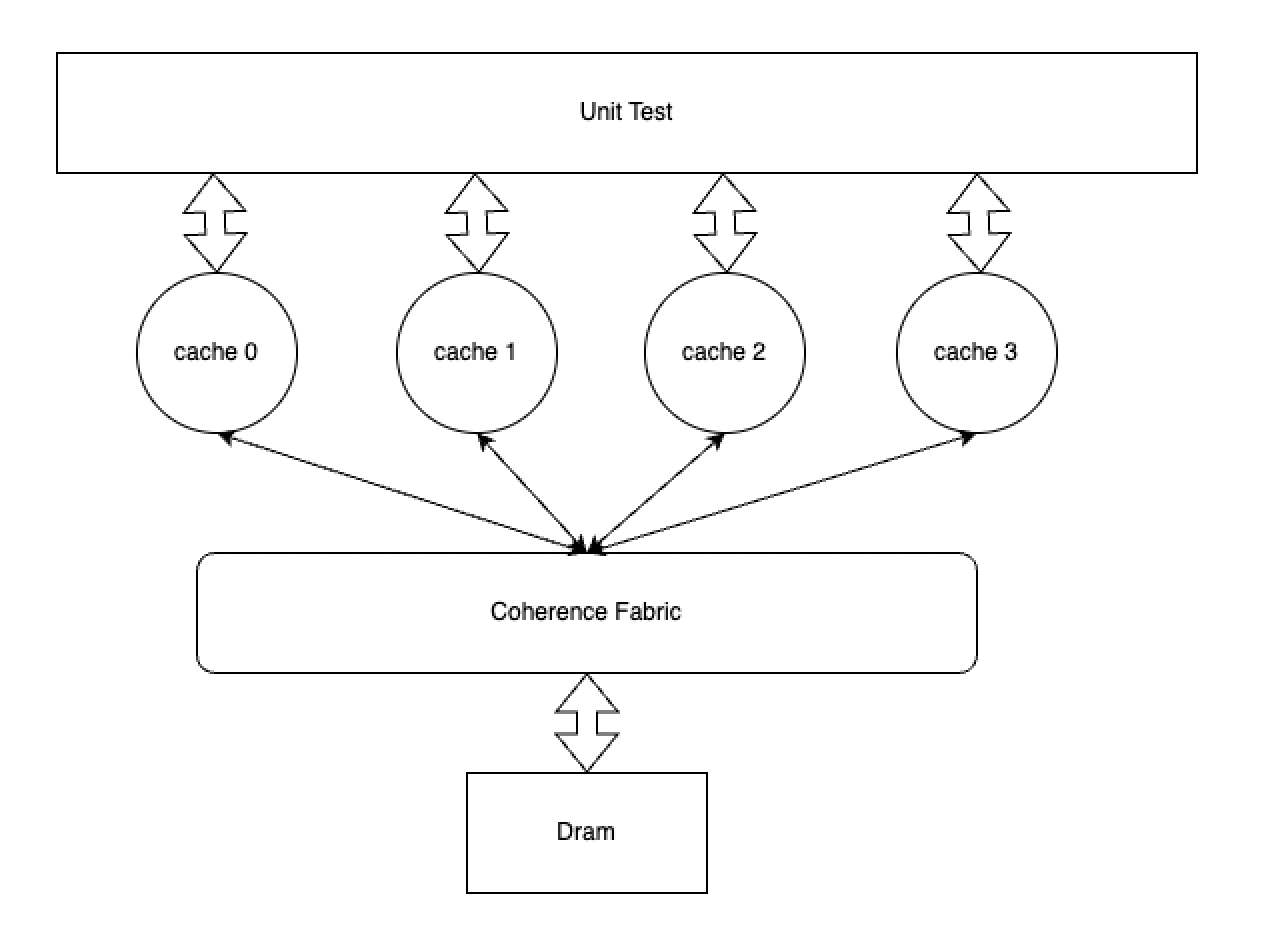

In [ ]:
!make verify_noc_and_cache

流式输出内容被截断，只能显示最后 5000 行内容。
cycle =                16459 , cpu           2 , store
rob tag  67
staddr 0600
st dat c3
change ut mem, save c3


cycle =                16463 , cpu           2 , load
arsnoop 0
araddr 0101
mesi 00


cycle =                16470 , cpu           2 , load
ar change mesi 20
araddr 0101


cycle =                16525 , cpu           2 , load
aw change mesi 00
awaddr 0600


cycle =                16525 , cpu           2 , load
awsnoop 2
awaddr 0600
mesi 00


cycle =                16537 , cpu           0 , load
aw change mesi 00
awaddr 0010


cycle =                16537 , cpu           0 , load
awsnoop 3
awaddr 0010
mesi 00


cycle =                16538 , cpu           0 , load
aw change data 00000000000000fc
awaddr 0010


cycle =                16538 , cpu           2 , load
arsnoop 1
araddr 0302
mesi 00


cycle =                16539 , cpu           0 , load
aw change data 0000000000000000
awaddr 0010


cycle =                16540 , cpu           0 , load
aw 

### Peripheral device verification

In this testcase, we configure the SoC with one testio, one uart and one gpio. We will initialize these devices one by one and read their register status. Then we will send signals by uart and gpio, checking whether signal is received by slave device successfully.

In [ ]:
!make verify_soc

/content/RainbowRio/tb
find: ‘find’: No such file or directory
find: ‘find’: No such file or directory
verilator -Mdir build --timescale 1ns/1ps --timescale-override 1ns/1ps --prof-cfuncs -CFLAGS -DVL_DEBUG --Wno-WIDTH --Wno-PINMISSING --Wno-VARHIDDEN --Wno-UNUSED --Wno-STMTDLY --Wno-ASSIGNDLY --Wno-LATCH --Wno-COMBDLY  --Wno-WIDTHCONCAT --Wno-IMPLICIT --Wno-LITENDIAN --Wno-SELRANGE --Wno-UNOPTFLAT --Wno-CASEINCOMPLETE --cc --trace --exe --build --top-module soc_tb ./tb_perips/soc_ut/soc_tb.v tb_perips/perips/off_chip/outside_uart.v tb_perips/perips/off_chip/testio.v tb_perips/perips/off_chip/w2m_bridge.v tb_perips/perips/off_chip/testio_wb.v tb_perips/perips/off_chip/testio_trx.v tb_perips/perips/on_chip/testio_ma.v tb_perips/perips/on_chip/testio_ma_wb.v tb_perips/perips/on_chip/plic.v tb_perips/perips/on_chip/io_generic_fifo.v tb_perips/perips/on_chip/std_dffre.v tb_perips/perips/on_chip/uart.v tb_perips/perips/on_chip/m2w_bridge.v tb_perips/perips/on_chip/crg.v tb_perips/perips/on_